Reference: 
[https://github.com/jakevdp/PythonDataScienceHandbook]

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

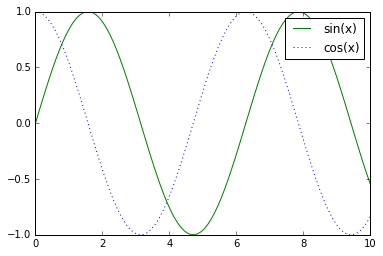

In [3]:
%matplotlib inline

import numpy as np

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.legend()


In [4]:
fig.savefig('first_fig.png')

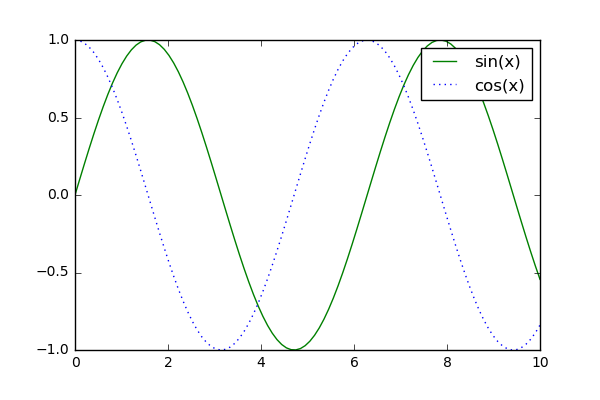

In [5]:
from IPython.display import Image
Image('first_fig.png')

### MATLAB-style Interface

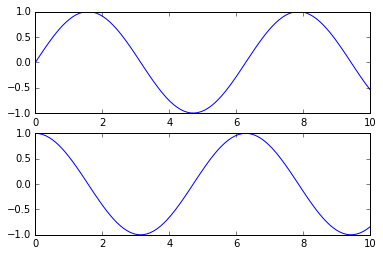

In [6]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

### Object-oriented interface

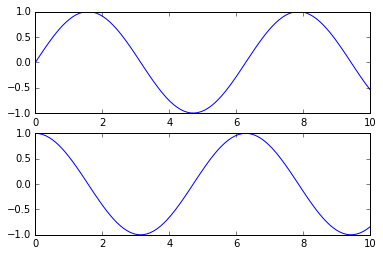

In [7]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

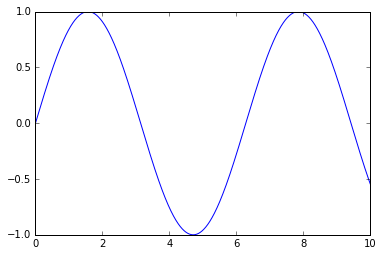

In [8]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

 - plt.xlabel() → ax.set_xlabel()
 - plt.ylabel() → ax.set_ylabel()
 - plt.xlim() → ax.set_xlim()
 - plt.ylim() → ax.set_ylim()
 - plt.title() → ax.set_title()

### Scatterplot

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()


In [10]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [11]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

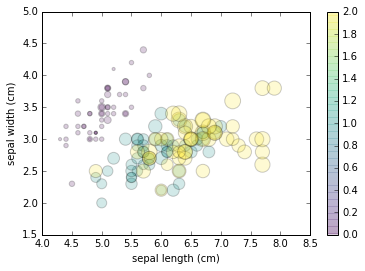

In [13]:
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,               # cmap : Colormap,
            s=100*features[3], c=iris.target, cmap='viridis')  # s: The marker size in points**2. # c : color
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar()


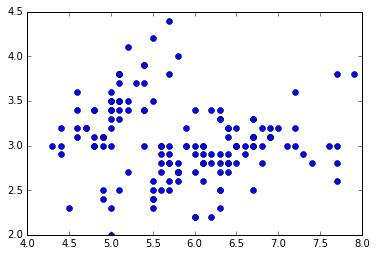

In [14]:
plt.plot(features[0], features[1], 'bo')

plt.plot should be preferred over plt.scatter for large datasets for performance reasons

### Histogram

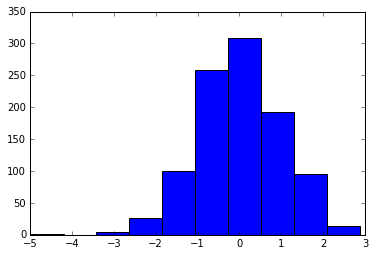

In [15]:
x = np.random.randn(1000)

plt.hist(x);   # uni-variate Gaussian

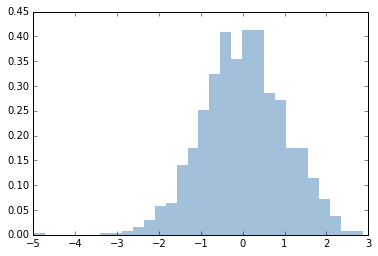

In [16]:
plt.hist(x, bins=30, normed=True, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

In [17]:
# Multivariate Gaussian and 2-D histogram
mean = [0, 0]
cov = [[1, 1], [1, 2]]  # Covariance matrix
x, y = np.random.multivariate_normal(mean, cov, 10000).T

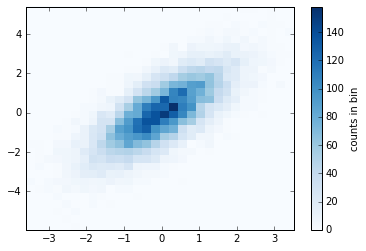

In [18]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

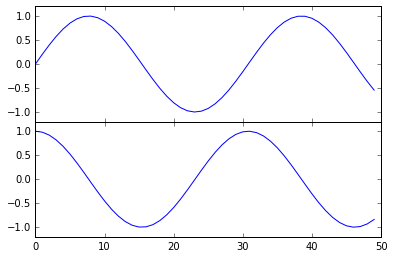

In [19]:
### Multiple subplots
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

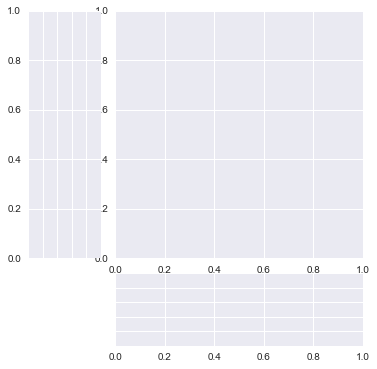

In [37]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)



In [41]:
# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

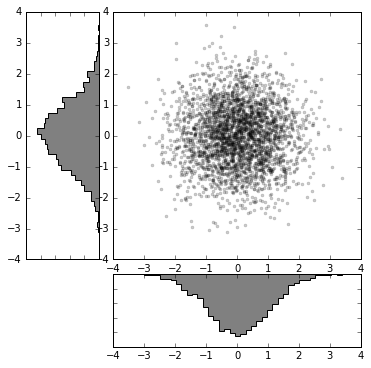

In [21]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 0], [0,1]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

### Geographic Data with Basemap

C:\Users\i803035\AppData\Local\Continuum\anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


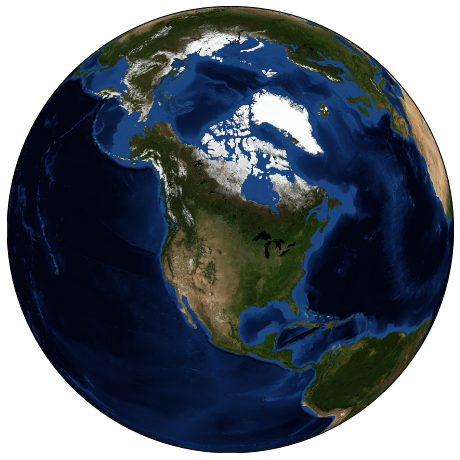

In [22]:
from mpl_toolkits.basemap import Basemap
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

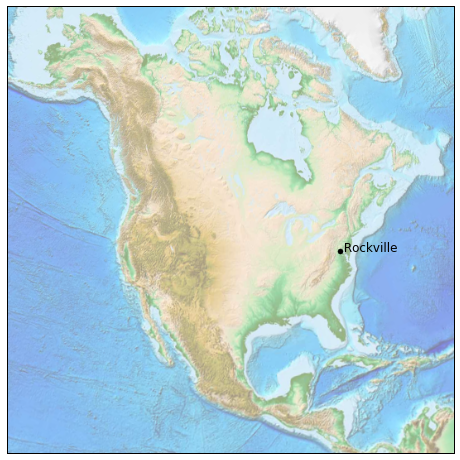

In [23]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-77.1528, 39.0840)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Rockville ', fontsize=12);

### Visualization with Seaborn


In [24]:
import seaborn as sns
sns.set()

In [29]:
# Histograms
import pandas as pd
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data[0:10, :]


array([[-1.8351802 , -0.97942562],
       [ 2.00381147,  2.62344862],
       [-1.22919268,  1.5328674 ],
       [-2.01840457, -1.03062191],
       [-2.86509818,  0.34458949],
       [ 1.83329037,  0.33974813],
       [ 0.90369866,  0.49420578],
       [ 1.83251631,  1.56473016],
       [ 3.53499542,  0.52336175],
       [ 0.66575452,  0.87951689]])

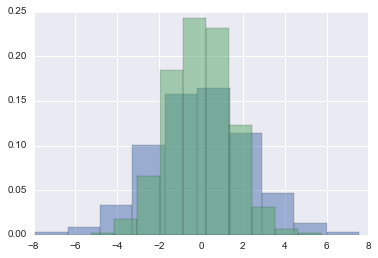

In [32]:
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

In [36]:
data['x'].max()

7.561330380763483

C:\Users\i803035\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


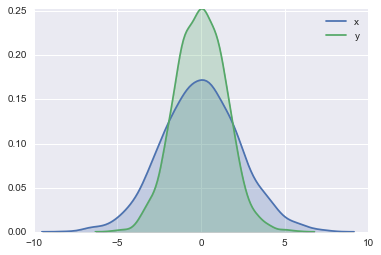

In [31]:
# Kernel Density Estimation
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

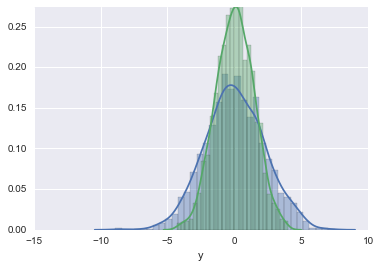

In [27]:
# Histograms and KDE can be combined using distplot:
sns.distplot(data['x'])
sns.distplot(data['y']);

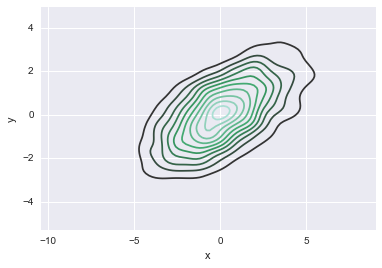

In [28]:
# If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional visualization of the data:
sns.kdeplot(data['x'], data['y']);

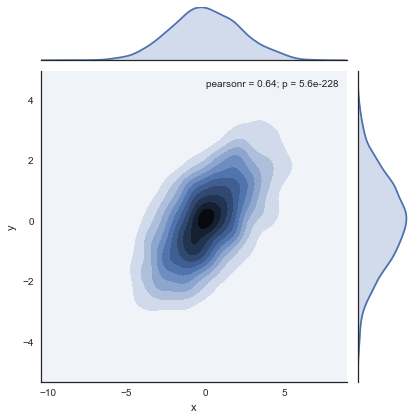

In [29]:
#  joint distribution and the marginal distributions together using sns.jointplot
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

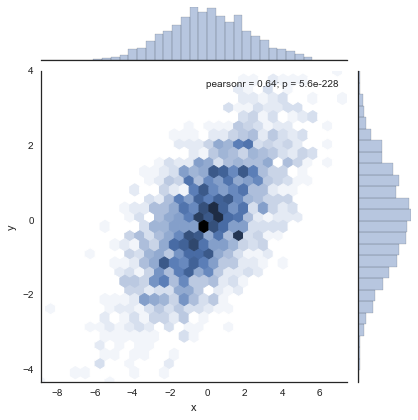

In [30]:
# hexagonally based histogram
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### Pair plots

In [31]:
# Explore correlations between multidimensional data,
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


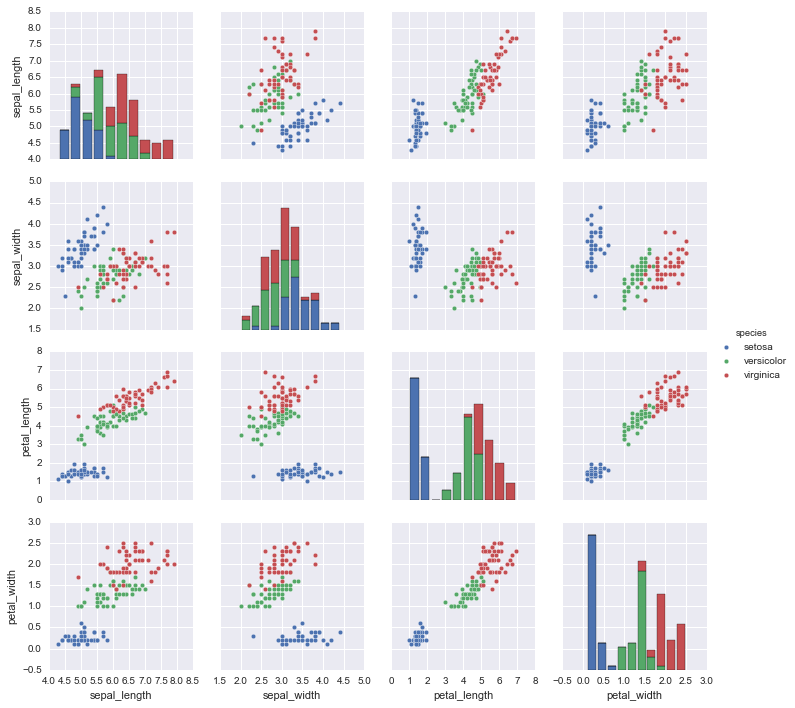

In [32]:
sns.pairplot(iris, hue='species', size=2.5);

### Faceted histograms

In [43]:
# Restaurant tips
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [45]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

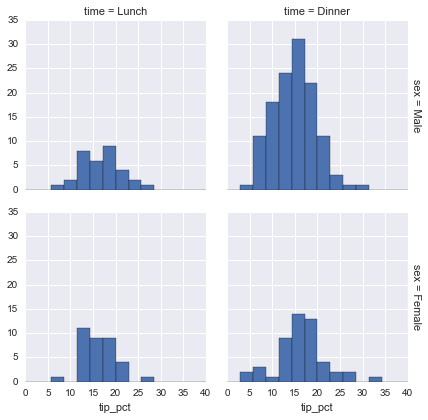

In [34]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### Factor Plots

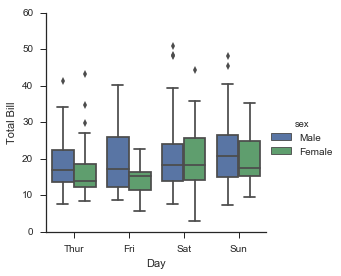

In [35]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

### Bar plots

In [36]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


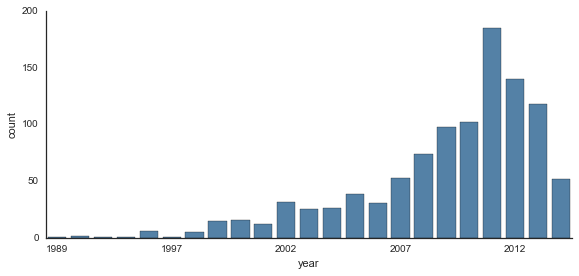

In [37]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)

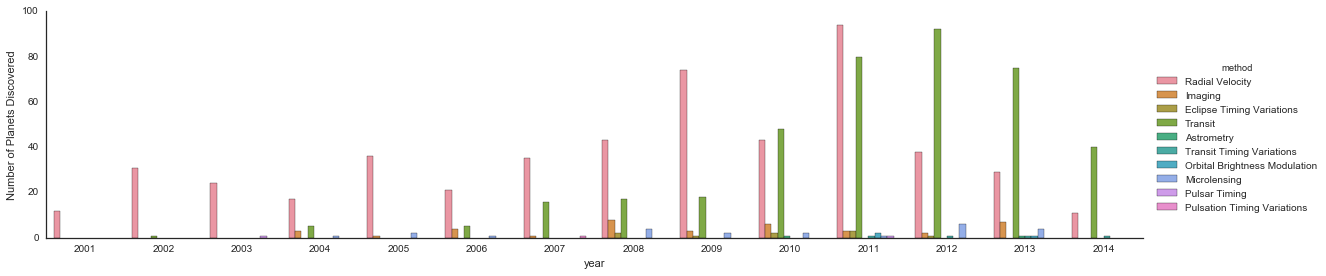

In [38]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')